## Dataset Overview

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\beaconhunter\data\beacon_events_train.csv")
print(df.head())

        event_id   host_id            timestamp          src_ip  \
0  EVT-373857567  HOST-116  2025-02-02 19:44:31  192.168.59.229   
1  EVT-380924157  HOST-028  2025-02-06 06:39:00   10.184.88.189   
2  EVT-674957844  HOST-055  2025-02-07 19:08:52  192.168.220.53   
3  EVT-910824095  HOST-107  2025-02-01 12:51:28   10.182.26.253   
4  EVT-959358092  HOST-008  2025-02-01 12:44:21   10.144.27.253   

          dst_ip  dst_port protocol  bytes_out  bytes_in  inter_event_seconds  \
0   30.22.199.92        53      dns       7883      3178            60.970370   
1   214.88.35.75        80      tcp       4905     33319           364.783584   
2   122.183.77.3       443    https       6785      3914            85.435310   
3  221.107.37.31       443    https       2694      3732            76.606740   
4   99.43.113.49       443    https       3379       824            78.295573   

        proc_name     user country_code  signed_binary  label  
0    rundll32.exe  user032           JP       

In [4]:
df.shape

(10000, 15)

Missing Values & Data Quality

In [5]:
df.isnull().sum()

event_id                 0
host_id                  0
timestamp                0
src_ip                   0
dst_ip                   0
dst_port                 0
protocol                 0
bytes_out                0
bytes_in                 0
inter_event_seconds    500
proc_name                0
user                     0
country_code             0
signed_binary            0
label                    0
dtype: int64

The only column containing missing (NaN) values is inter_event_seconds, with 500 missing entries as you can see it above

## LABEL DISTRIBUTION (Benign vs Malicious Events)

In [6]:
count = df['label'].value_counts()

In [7]:
print(count)

label
0    7764
1    2236
Name: count, dtype: int64


In [8]:
len(df)

10000

In [9]:
percentage = (count/len(df)) * 100

In [10]:
print(percentage)

label
0    77.64
1    22.36
Name: count, dtype: float64


If you see, percentage of normal is around 78% and malicious is 22%
In label distribution, Most of the activity in the dataset is normal, harmless behavior and only a smaller portion is malicious.
If i talk in terms of security, malicious activity is naturally rarer than normal activity and understanding the imbalance is important to avoid building systems that looks full accuracte but fails to detect the real threats

## Inter-Event Timing Behavior

In [13]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.3 MB 4.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.3 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.3 MB 3.7 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.3 MB 3.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.3 MB 3.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.3 MB 3.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.7/8.3 MB 2.7 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.3 MB 2.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.7/8.3 MB 2.5 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.3 MB 2.5 MB/s eta 0:00:02
   ----------------------------- ---------- 6.0/8.3 MB 2.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.8/8.3 MB 2.8 MB/s eta 0:00:01
   ----------------

In [14]:
import matplotlib.pyplot as plt

In [18]:
df_non_null = df.dropna(subset=['inter_event_seconds'])

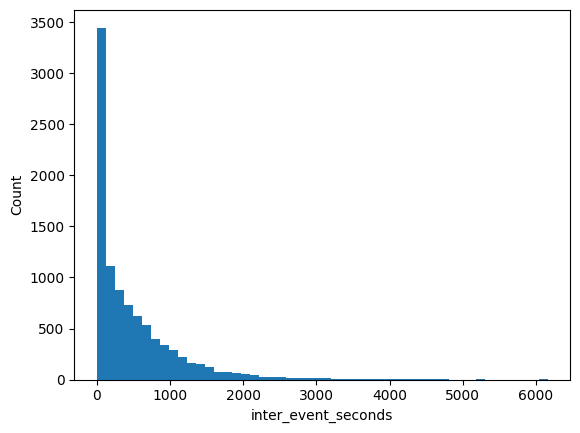

In [23]:
plt.hist(df_non_null['inter_event_seconds'], bins=50)    ##Choice of bins is heuristic ok
plt.xlabel('inter_event_seconds')
plt.ylabel('Count')
plt.show()

From the above observation, I can say that it is heavily right-Skewed

In [24]:
## Now I am splitting the data to check benign and malicious
benign = df[df['label'] == 0].dropna(subset=['inter_event_seconds'])
malicious = df[df['label'] == 1].dropna(subset=['inter_event_seconds'])

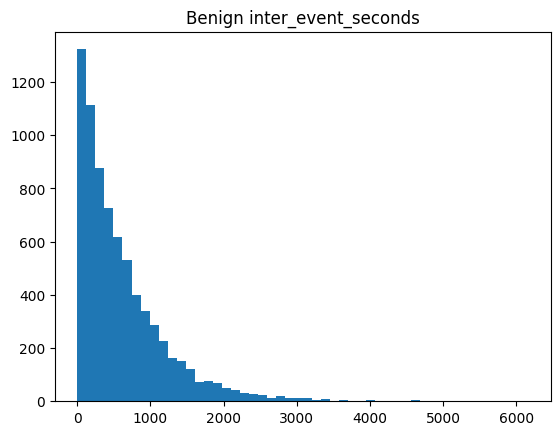

In [25]:
plt.hist(benign['inter_event_seconds'], bins=50)
plt.title('Benign inter_event_seconds')
plt.show()

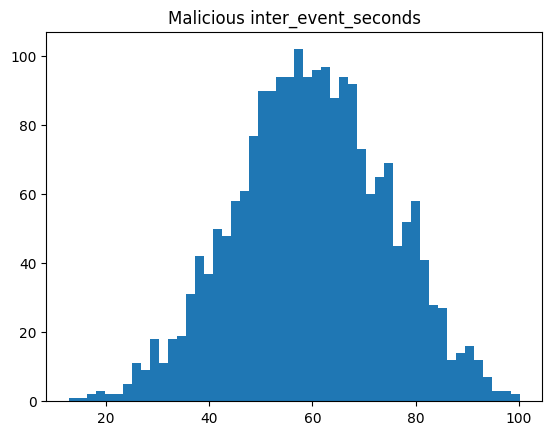

In [26]:
plt.hist(malicious['inter_event_seconds'], bins=50)
plt.title('Malicious inter_event_seconds')
plt.show()

So my observation is very clear that if you see Benign event, it is right-skewed as well as we can interpret from the graph that because of this patter, it can be mostly be through human interactiveness activity. Now coming to Malicious event, if you see, there is a tight distribution and clustering in a fixed interval(Mostly at 60s). 

## Traffic Volume Patterns (Bytes In / Bytes Out)

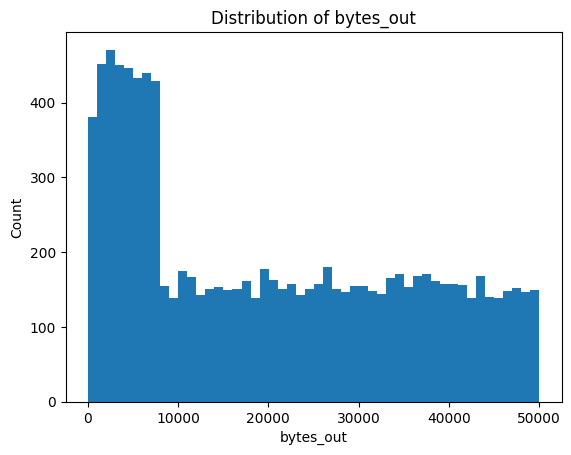

In [29]:
plt.hist(df['bytes_out'], bins=50)
plt.xlabel('bytes_out')
plt.ylabel('Count')
plt.title('Distribution of bytes_out')
plt.show()

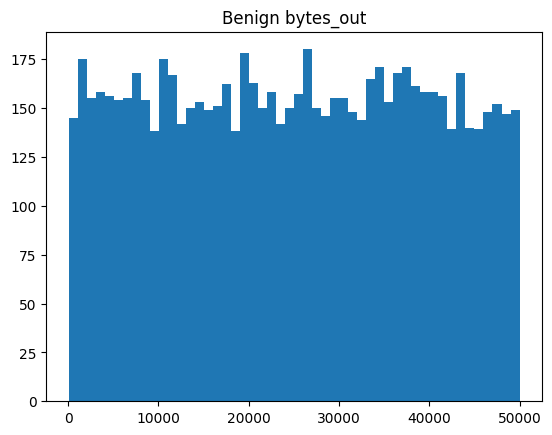

In [30]:
plt.hist(df[df['label'] == 0]['bytes_out'], bins=50)
plt.title('Benign bytes_out')
plt.show()

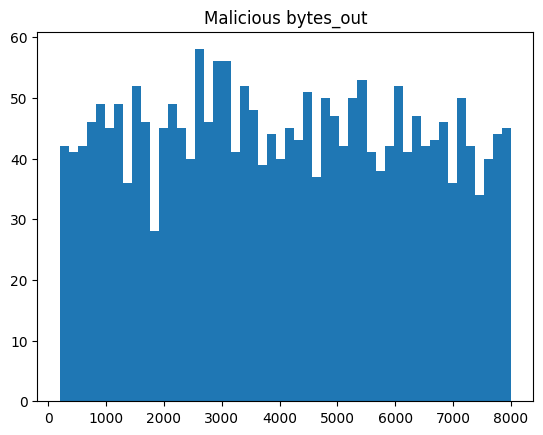

In [31]:
plt.hist(df[df['label'] == 1]['bytes_out'], bins=50)
plt.title('Malicious bytes_out')
plt.show()

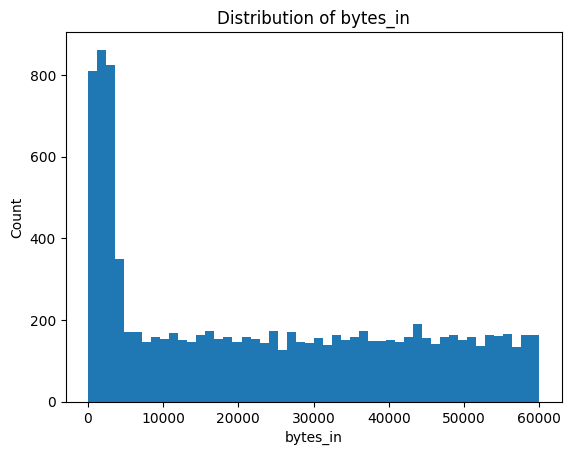

In [32]:
plt.hist(df['bytes_in'], bins=50)
plt.xlabel('bytes_in')
plt.ylabel('Count')
plt.title('Distribution of bytes_in')
plt.show()

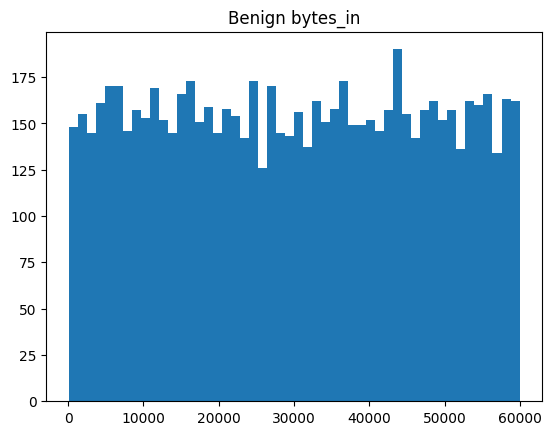

In [33]:
plt.hist(df[df['label'] == 0]['bytes_in'], bins=50)
plt.title('Benign bytes_in')
plt.show()

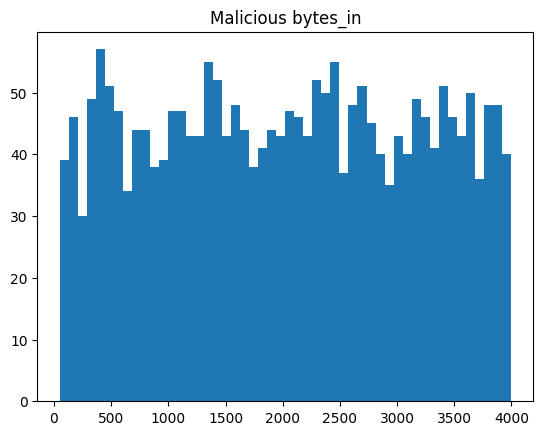

In [34]:
plt.hist(df[df['label'] == 1]['bytes_in'], bins=50)
plt.title('Malicious bytes_in')
plt.show()

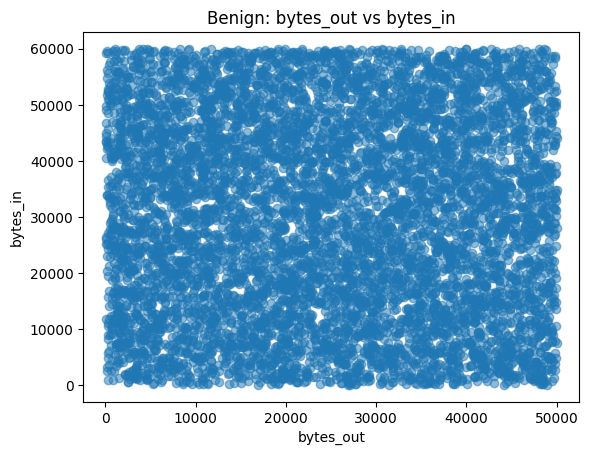

In [35]:
plt.scatter(df[df['label'] == 0]['bytes_out'],
            df[df['label'] == 0]['bytes_in'],
            alpha=0.5)
plt.xlabel('bytes_out')
plt.ylabel('bytes_in')
plt.title('Benign: bytes_out vs bytes_in')
plt.show()

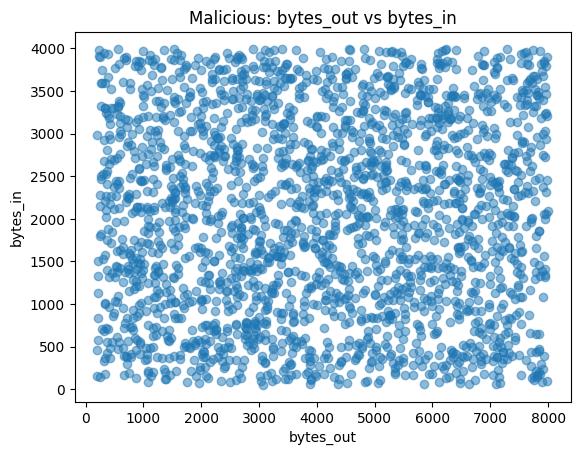

In [36]:
plt.scatter(df[df['label'] == 1]['bytes_out'],
            df[df['label'] == 1]['bytes_in'],
            alpha=0.5)
plt.xlabel('bytes_out')
plt.ylabel('bytes_in')
plt.title('Malicious: bytes_out vs bytes_in')
plt.show()

Al notes observed in this part are mentioned in Notes.md

## Destination Ports and Protocols

In [37]:
df['dst_port'].value_counts().head(10)

dst_port
443      1813
8080     1404
80       1173
53       1163
995       973
993       950
8443      943
37824       2
28883       2
24678       2
Name: count, dtype: int64

In [40]:
df[df['label'] == 0]['dst_port'].value_counts().head(10)    #benign PORTS

dst_port
995      973
443      954
993      950
80       945
8443     943
53       926
8080     918
24678      2
37824      2
2422       2
Name: count, dtype: int64

In [41]:
df[df['label'] == 1]['dst_port'].value_counts().head(10)     # Mailicious ports

dst_port
443      859
8080     486
53       237
80       228
62170      2
18305      2
21319      1
16563      1
19116      1
36642      1
Name: count, dtype: int64

My analysis for this is that, as destination port frequency shows that both benign and malicious traffic uses common, widely allowed ports such as 443, 80, 53, and 8080. This indicates that destination port alone is insufficient to distinguish malicious activity

In [42]:
df['protocol'].value_counts()

protocol
tcp      5384
https    2756
dns      1163
udp       697
Name: count, dtype: int64

In [43]:
df[df['label'] == 0]['protocol'].value_counts()

protocol
tcp      4338
https    1897
dns       926
udp       603
Name: count, dtype: int64

In [44]:
df[df['label'] == 1]['protocol'].value_counts()

protocol
tcp      1046
https     859
dns       237
udp        94
Name: count, dtype: int64

Protocol analysis shows that both benign and malicious events are dominated by common protocols such as TCP and HTTPS with DNS also appearing frequently.

## Process Context Analysis (proc_name)

In [45]:
df['proc_name'].value_counts().head(15)

proc_name
firefox.exe          803
teams.exe            776
zoom.exe             773
word.exe             763
outlook.exe          759
spotify.exe          758
slack.exe            748
onedrive.exe         747
chrome.exe           735
excel.exe            724
meterpreter.exe      275
cmd.exe              264
sliver-client.exe    257
rundll32.exe         237
powershell.exe       235
Name: count, dtype: int64

In [46]:
df[df['label'] == 0]['proc_name'].value_counts().head(15)

proc_name
firefox.exe          737
teams.exe            714
zoom.exe             711
outlook.exe          699
onedrive.exe         698
word.exe             695
slack.exe            690
spotify.exe          685
chrome.exe           673
excel.exe            652
sliver-client.exe    102
meterpreter.exe       84
regsvr32.exe          83
mshta.exe             82
wscript.exe           81
Name: count, dtype: int64

In [47]:
df[df['label'] == 1]['proc_name'].value_counts().head(15)

proc_name
meterpreter.exe      191
cmd.exe              184
powershell.exe       171
rundll32.exe         158
unknown.bin          158
sliver-client.exe    155
regsvr32.exe         152
cscript.exe          149
mshta.exe            145
wscript.exe          141
spotify.exe           73
excel.exe             72
word.exe              68
firefox.exe           66
chrome.exe            62
Name: count, dtype: int64

Benign traffic is dominated by common user-facing applications and the malicious events are concentrated in a smaller set of processes. The scripting engines and LOLBins appear disproportionately in malicious events. Process name alone is not definitive and must be combined with behavioral features

## Destination Country (GeoIP) Analysis

In [48]:
df['country_code'].value_counts().head(10)

country_code
US    2160
IN     794
CA     750
DE     750
FR     745
GB     731
NL     717
JP     709
CN     281
RU     276
Name: count, dtype: int64

In [49]:
df[df['label'] == 0]['country_code'].value_counts().head(10)

country_code
US    1931
IN     725
GB     682
DE     678
CA     677
FR     666
NL     637
JP     634
VN     132
RU     124
Name: count, dtype: int64

In [51]:
df[df['label'] == 1]['country_code'].value_counts().head(10)

country_code
US    229
CN    161
BR    157
TR    156
IR    155
RU    152
HK    150
UA    149
NG    146
VN    142
Name: count, dtype: int64

Benign traffic is distributed across common enterprise and SaaS regions. The malicious traffic shows a different distribution with more concentration in fewer countries. US appears in both benign and malicious events, indicating GeoIP is not definitive. Country information provides weak contextual signal and must be combined with other features and also very important that GeoIP-based detection is limited by VPNs, CDNs and cloud hosting

## Feature 1 – Timing Regularity (Beacon-ness)

In [54]:
df_timing = df.dropna(subset=['inter_event_seconds']).copy()

In [55]:
group_cols = ['host_id', 'dst_ip', 'dst_port']

In [56]:
timing_features = (df_timing.groupby(group_cols).agg(timing_stddev=('inter_event_seconds', 'std'),
        timing_event_count=('inter_event_seconds', 'count')).reset_index())

In [57]:
df = df.merge(timing_features, on=group_cols, how='left')

In [58]:
df[['timing_stddev', 'timing_event_count']].describe()

,timing_stddev,timing_event_count
count,0.0,9500.0
mean,NaN,1.0
std,NaN,0.0
min,NaN,1.0
25%,NaN,1.0
50%,NaN,1.0
75%,NaN,1.0
max,NaN,1.0


In [59]:
df.loc[df['timing_event_count'] < 2, 'timing_stddev'] = None

In [60]:
df['timing_event_count'].value_counts().head()

timing_event_count
1.0    9500
Name: count, dtype: int64

Initial grouping by (host_id, dst_ip, dst_port) resulted in mostly single-event groups preventing meaningful variance calculation. This suggests the dataset is event-level and does not preserve repeated connections at that granularity. The grouping was adjusted to capture repeated communication patterns.

In [69]:
df_timing = df.dropna(subset=['inter_event_seconds']).copy()

In [70]:
group_cols = ['host_id', 'dst_ip']

In [71]:
timing_features = (df_timing.groupby(group_cols).agg(timing_stddev=('inter_event_seconds', 'std'),
            timing_event_count=('inter_event_seconds', 'count')).reset_index())

In [72]:
df = df.merge(timing_features, on=group_cols, how='left')

In [67]:
df.columns

Index(['event_id', 'host_id', 'timestamp', 'src_ip', 'dst_ip', 'dst_port',
       'protocol', 'bytes_out', 'bytes_in', 'inter_event_seconds', 'proc_name',
       'user', 'country_code', 'signed_binary', 'label', 'timing_stddev_x',
       'timing_event_count_x', 'timing_stddev_y', 'timing_event_count_y'],
      dtype='object')

In [75]:
df = df.drop(columns=[c for c in df.columns if c.startswith('timing_')],errors='ignore')

In [76]:
df_timing = df.dropna(subset=['inter_event_seconds']).copy()

In [77]:
group_cols = ['host_id', 'dst_ip']

In [79]:
timing_features = (df_timing.groupby(group_cols).agg(timing_stddev=('inter_event_seconds', 'std'),
            timing_event_count=('inter_event_seconds', 'count')).reset_index())

In [80]:
df = df.merge(timing_features, on=group_cols, how='left')

In [81]:
df.loc[df['timing_event_count'] < 2, 'timing_stddev'] = None

In [82]:
df['timing_event_count'].value_counts().head()

timing_event_count
1.0    9500
Name: count, dtype: int64

In [83]:
df[['timing_stddev', 'timing_event_count']].describe()

,timing_stddev,timing_event_count
count,0.0,9500.0
mean,NaN,1.0
std,NaN,0.0
min,NaN,1.0
25%,NaN,1.0
50%,NaN,1.0
75%,NaN,1.0
max,NaN,1.0


Initial attempts to compute timing variance per connection were not feasible because the dataset contains only one event per (host_id, dst_ip) pair. This indicates the data is event-level and does not preserve repeated temporal sequences.

In [84]:
df_timing = df.dropna(subset=['inter_event_seconds']).copy()

In [85]:
BEACON_INTERVAL = 60

In [86]:
df_timing['timing_distance_from_60s'] = (df_timing['inter_event_seconds'] - BEACON_INTERVAL).abs()

In [87]:
df = df.merge(df_timing[['event_id', 'timing_distance_from_60s']],on='event_id',how='left')

In [88]:
df['timing_distance_from_60s'].describe()

count    9500.000000
mean      433.353617
std       576.071752
min         0.003115
25%        22.776646
50%       209.569736
75%       631.847043
max      6103.562442
Name: timing_distance_from_60s, dtype: float64

In [89]:
df[df['label'] == 0]['timing_distance_from_60s'].describe()

count    7376.000000
mean      554.729626
std       601.257715
min         0.047454
25%       120.320031
50%       365.919807
75%       788.577612
max      6103.562442
Name: timing_distance_from_60s, dtype: float64

In [90]:
df[df['label'] == 1]['timing_distance_from_60s'].describe()

count    2124.000000
mean       11.851997
std         8.715066
min         0.003115
25%         4.802849
50%        10.004779
75%        17.536967
max        47.224673
Name: timing_distance_from_60s, dtype: float64

Because the dataset is event-level, timing regularity was modeled per event rather than per connection. We measured how close each event’s inter-event timing was to a common beacon interval (60 seconds). Malicious events showed a much smaller distance to this interval with low variance, while benign events exhibited widely distributed and irregular timing. This makes timing distance a strong behavioral signal for beaconing.

## Feature 2 – Destination Port Weirdness

In [92]:
TOP_N_PORTS = 10

In [96]:
common_ports = (df['dst_port'].value_counts().head(TOP_N_PORTS).index.tolist())

In [97]:
common_ports

[443, 8080, 80, 53, 995, 993, 8443, 37824, 28883, 24678]

In [98]:
df['is_rare_port'] = (~df['dst_port'].isin(common_ports)).astype(int)

In [99]:
df['is_rare_port'].value_counts(normalize=True)

is_rare_port
0    0.8425
1    0.1575
Name: proportion, dtype: float64

In [100]:
df.groupby('label')['is_rare_port'].mean()

label
0    0.148120
1    0.190072
Name: is_rare_port, dtype: float64

In [101]:
pd.crosstab(df['label'], df['is_rare_port'], normalize='index')

is_rare_port,0,1
label,,
0,0.851880,0.148120
1,0.809928,0.190072


## Feature 3 – Process Risk Score

In [103]:
df['proc_name_norm'] = (df['proc_name'].fillna('unknown').str.lower())

In [104]:
# High-risk (frequently abused / attacker tooling)
high_risk_procs = {
    'powershell.exe',
    'cmd.exe',
    'rundll32.exe',
    'regsvr32.exe',
    'mshta.exe',
    'wscript.exe',
    'cscript.exe',
    'meterpreter.exe',
    'sliver-client.exe',
    'unknown.bin'
}

# Low-risk (common user applications)
low_risk_procs = {
    'chrome.exe',
    'firefox.exe',
    'edge.exe',
    'word.exe',
    'excel.exe',
    'outlook.exe',
    'teams.exe',
    'zoom.exe',
    'slack.exe',
    'onedrive.exe',
    'spotify.exe'
}

In [105]:
df['process_risk_score'] = 1

In [106]:
df.loc[df['proc_name_norm'].isin(high_risk_procs), 'process_risk_score'] = 2

In [107]:
df.loc[df['proc_name_norm'].isin(low_risk_procs), 'process_risk_score'] = 0

In [108]:
df['process_risk_score'].value_counts()

process_risk_score
0    7586
2    2414
Name: count, dtype: int64

In [109]:
df.groupby('label')['process_risk_score'].mean()

label
0    0.208655
1    1.434705
Name: process_risk_score, dtype: float64

In [110]:
pd.crosstab(df['label'], df['process_risk_score'], normalize='index')

process_risk_score,0,2
label,,
0,0.895672,0.104328
1,0.282648,0.717352


## Feature 4 – GeoIP Risk Buckets

In [111]:
df['country_code_norm'] = (df['country_code'].fillna('UNKNOWN').str.upper())

In [112]:
low_risk_countries = {'US', 'CA', 'GB', 'DE', 'FR', 'NL', 'JP', 'IN'}

In [113]:
high_risk_countries = {'CN', 'RU', 'IR', 'TR', 'UA', 'NG', 'BR', 'HK', 'VN'}

In [114]:
df['geoip_risk_bucket'] = 1

In [115]:
df.loc[df['country_code_norm'].isin(high_risk_countries),'geoip_risk_bucket'] = 2

In [116]:
df.loc[df['country_code_norm'].isin(low_risk_countries),'geoip_risk_bucket'] = 0

In [117]:
df['geoip_risk_bucket'].value_counts()

geoip_risk_bucket
0    7356
2    2395
1     249
Name: count, dtype: int64

In [118]:
df.groupby('label')['geoip_risk_bucket'].mean()

label
0    0.278336
1    1.287120
Name: geoip_risk_bucket, dtype: float64

In [119]:
pd.crosstab(df['label'],df['geoip_risk_bucket'],normalize='index')

geoip_risk_bucket,0,1,2
label,,,
0,0.853941,0.013782,0.132277
1,0.324687,0.063506,0.611807
